In [1]:
import json
import os
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from src.utils.UsefulPaths import Paths
from sklearn.cluster import KMeans
from src.utils.KnnUtils import OptimalCluster
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)

2023-11-04 21:47:58,877 - DEBUG - matplotlib data path: C:\Users\Thiago\PycharmProjects\genome\venv\Lib\site-packages\matplotlib\mpl-data
2023-11-04 21:47:58,886 - DEBUG - CONFIGDIR=C:\Users\Thiago\.matplotlib
2023-11-04 21:47:58,888 - DEBUG - interactive is False
2023-11-04 21:47:58,888 - DEBUG - platform is win32
2023-11-04 21:47:58,945 - DEBUG - CACHEDIR=C:\Users\Thiago\.matplotlib
2023-11-04 21:47:58,948 - DEBUG - Using fontManager instance from C:\Users\Thiago\.matplotlib\fontlist-v330.json


In [3]:
paths = Paths()

with open(paths.json_subsectors, 'r') as file:
    subsectors = json.load(file)

In [4]:
df_abstract_patents = pd.read_csv(os.path.join(paths.data_processed, 'abstract_patents_sliced_15000.csv'))

In [5]:
slice_number = 1000
df_sliced = df_abstract_patents[:slice_number]
df_sliced.to_csv(os.path.join(paths.data_processed, 'abstract_patents_sliced.csv'), index=False)
df_sliced

,publication_number,abstract,word_count,app_name,app_year,city,country,country_name,ecosystem,grant_date,grant_year,app_date,class_concat,class_distinct_count,class_ipc_concat,class_ipc_distinct_count,processed_abstract,token_count
0,20180152842,"A method, and a mobile device adapted thereto,...",80,Moorim Kim,2018,Seoul,KR,"Korea, Republic of",Seoul,2018-05-31 00:00:00+00:00,2018,2018-01-29 00:00:00+00:00,"H04M,H04W,G06F",3.00,"G06F,H04M,H04W",3.00,method mobile device adapt thereto verify user...,46
1,20180140889,A dumbbell with a selectable number of weight ...,131,Per HÖGLUND,2018,Jonkoping,SE,Sweden,Jonkoping,2018-05-24 00:00:00+00:00,2018,2018-01-03 00:00:00+00:00,A63B,1.00,A63B,1.00,dumbbell selectable number weight disk include...,76
2,20180143803,A virtual assistant AI system that may be conn...,83,David Placa,2018,San Francisco,US,United States,Silicon Valley,2018-05-24 00:00:00+00:00,2018,2018-01-16 00:00:00+00:00,G06F,1.00,G06F,1.00,virtual assistant ai system connect wide varie...,49
3,20180169402,Connector assemblies that are separate from me...,101,Patrick Wells,2018,Columbia Heights,US,United States,Minneapolis,2018-06-21 00:00:00+00:00,2018,2018-02-15 00:00:00+00:00,"H01R,A61N",2.00,"A61N,H01R",2.00,connector assembly separate medical lead exten...,60
4,20180163931,"An LED tube lamp, comprising a lamp tube, whic...",130,Aiming Xiong,2018,Jiaxing,CN,China,Hangzhou,2018-06-14 00:00:00+00:00,2018,2018-02-06 00:00:00+00:00,"F21Y,F21K,F21V,H05B",4.00,"F21K,F21V,F21Y,H05B",4.00,led tube lamp comprise lamp tube include light...,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20180128819,Methods for preparation of cells for analysis ...,112,Jita De,2018,Costa Mesa,US,United States,Los Angeles,2018-05-10 00:00:00+00:00,2018,2018-01-08 00:00:00+00:00,G01N,1.00,G01N,1.00,method preparation cell analysis biomarker dis...,56
996,20180171674,The present disclosure provides lockable cover...,80,Shadi AbuGhazaleh,2018,Guilford,US,United States,Hartford,2018-06-21 00:00:00+00:00,2018,2018-02-15 00:00:00+00:00,"E05B,H05K",2.00,"E05B,H05K",2.00,present disclosure provide lockable cover asse...,49
997,20180159626,A data communication system comprises an optic...,145,Donald Chang,2018,Thousand Oaks,US,United States,Los Angeles,2018-06-07 00:00:00+00:00,2018,2018-01-29 00:00:00+00:00,"H04J,H04B,H04Q",3.00,"H04B,H04J,H04Q",3.00,data communication system comprise optical tra...,100
998,20180130519,Systems are provided for a three dimension sta...,165,Chien-Yuan Chen,2018,Hsinchu,TW,"Taiwan, Province of China",Taipei City,2018-05-10 00:00:00+00:00,2018,2018-01-09 00:00:00+00:00,"H01L,G11C",2.00,"G11C,H01L",2.00,system provide dimension static random access ...,103


In [9]:
embedder = SentenceTransformer('distilbert-base-uncased')

2023-11-04 21:48:42,622 - INFO - Load pretrained SentenceTransformer: distilbert-base-uncased
2023-11-04 21:48:42,830 - DEBUG - https://huggingface.co:443 "GET /api/models/distilbert-base-uncased HTTP/1.1" 200 8027
2023-11-04 21:48:43,001 - DEBUG - https://huggingface.co:443 "HEAD /distilbert-base-uncased/resolve/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/.gitattributes HTTP/1.1" 200 0
2023-11-04 21:48:43,172 - DEBUG - https://huggingface.co:443 "HEAD /distilbert-base-uncased/resolve/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/LICENSE HTTP/1.1" 200 0
2023-11-04 21:48:43,338 - DEBUG - https://huggingface.co:443 "HEAD /distilbert-base-uncased/resolve/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/README.md HTTP/1.1" 200 0
2023-11-04 21:48:43,504 - DEBUG - https://huggingface.co:443 "HEAD /distilbert-base-uncased/resolve/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/config.json HTTP/1.1" 200 0
2023-11-04 21:48:43,673 - DEBUG - https://huggingface.co:443 "HEAD /distilbert-base-uncased/resolve/6cdc0aad91f5

In [10]:
sentences = list(df_sliced.processed_abstract)

In [11]:
sentences_embeddings = embedder.encode(sentences)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [12]:
sentences_embeddings_normalized = sentences_embeddings / np.linalg.norm(x=sentences_embeddings, axis=1, keepdims=True)

2023-11-04 21:49:22,112 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-11-04 21:49:22,113 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-11-04 21:49:22,115 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.200000000000001.
2023-11-04 21:49:22,116 - DEBUG - findfont: score(FontEntry(fname='C:\\Users\\Thiago\\PycharmProjects\\genome\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-11-04 21:49:22,117 - DEBUG - findfont: score(FontEntry(fname='C:\\Users\\Thiago\\PycharmProjects\\genome\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-11-04 21:49:2

Optimal k for elbow method: 8
Optimal k for silhouette method: 2


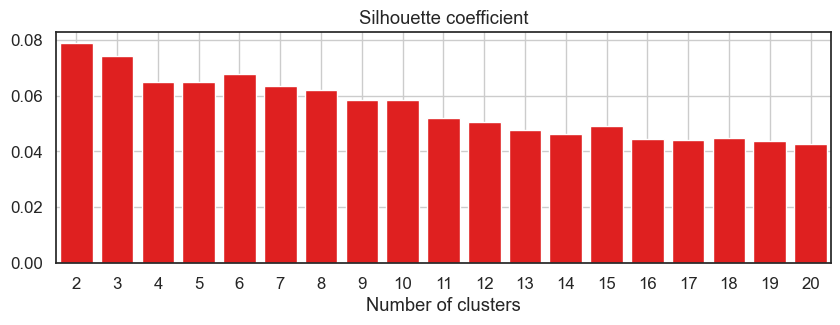

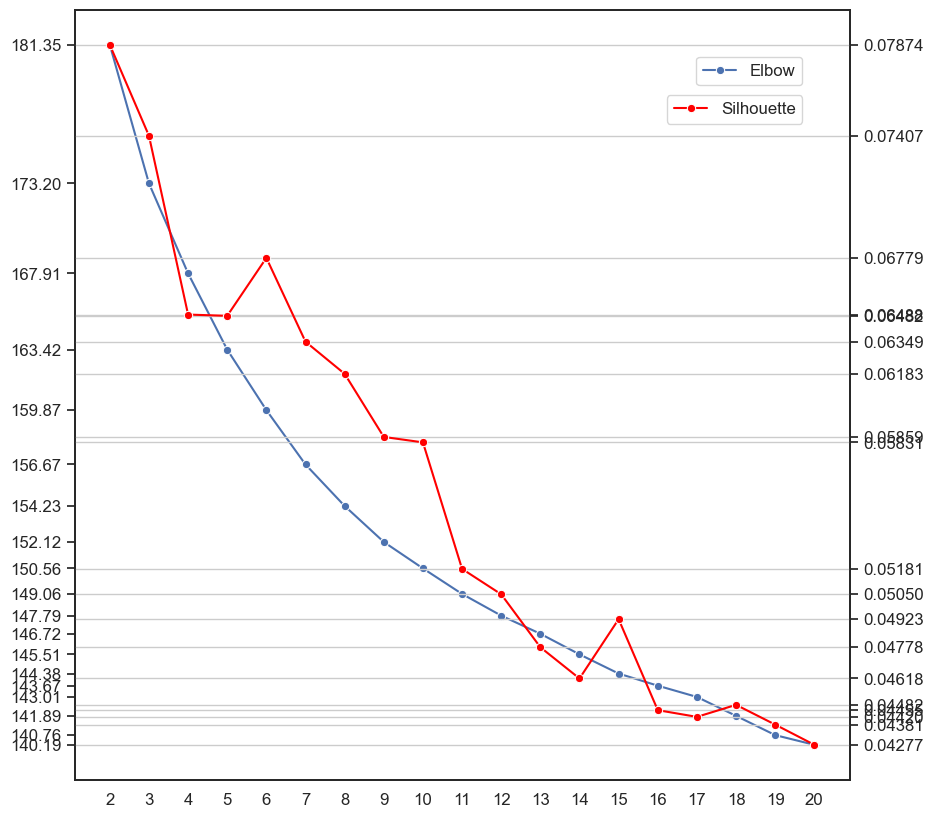

In [13]:
optimal_clusters = OptimalCluster(data=sentences_embeddings_normalized, n_cluster_min=2, n_cluster_max=20, random_state=42)

In [14]:
knn_model = KMeans(n_clusters=18, random_state=42, n_init='auto')
knn_model.fit(sentences_embeddings_normalized)
knn_labels = knn_model.labels_
print(knn_labels)

[15 10 15 10  9  9  6  0 15  1 10  3 10 13 10 10 15  4  9  0 12  0 13  6
 14 17 13  0 15  4 10  7  8 16 16 13 17  5 15  4 16  2  0 14  4 12 10 13
  5  4  8 13 13  1  3  5  2 16  7  6 11  4  8  0 15 17 10  5 13  5  1 17
  6 17 14  6 10 17 17  0 15  1  3 11 15 11 12 14 10 15  4  0  1 13 17 11
  8 11 11  3  1  1  5  4 11  9 10  0 16 13 17 12 13 10 15 15  2 15  9 17
  1  6  0 10  6 17 15 16  5  1 15 16  0  9  5  3 17  8 14  5  5 11 14 16
 17  5  5 16 15  3  5  2 17  5 10 11  8  3  8  4 17  8  0  6  3 17 10 12
  8 17 13 11 15 10  1  0  6  5 11 12  0  4 10 15  3  8 10  4  0  6  6  1
  6 17  3  8 10 12  6  3  6  6  1 13 13  1  4  4  9  5 10 11  8  5  4  6
  4  3 14  7  5 15 12 17  0 12  6  9 12  7  2  4  0  9 16  6  2 14 16 16
  5 12  1 15 15 14  6 16 10  7 15  8 12  0  9 14  8  5  9  4 17  5  1  6
  1  1  2 10 10  6 16  9  8 12 12  9  5 17  6  4 13 11  0  1 10 16 17  3
 16 14 17  8  5 10 10  1  4  3  7  0 10 17  5  0  8  6  5 13 13 16  6  0
  4  1 12  5 14 15  4 12  1 16  8 16 11  1  8  4 15

In [15]:
df_new = pd.DataFrame({'abstract': sentences, 'class': knn_labels})
df_new

,abstract,class
0,method mobile device adapt thereto verify user...,15
1,dumbbell selectable number weight disk include...,10
2,virtual assistant ai system connect wide varie...,15
3,connector assembly separate medical lead exten...,10
4,led tube lamp comprise lamp tube include light...,9
...,...,...
995,method preparation cell analysis biomarker dis...,1
996,present disclosure provide lockable cover asse...,7
997,data communication system comprise optical tra...,3
998,system provide dimension static random access ...,5
